In [17]:
!pip install scikit-surprise

from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, GridSearchCV

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# 사용자 / 기사 / 단어에 대한 더미 데이터 생성
users = ['user' + str(i) for i in range(1, 1001)]
articles = ['article' + str(i) for i in range(1, 1001)]
words = ['word' + str(i) for i in range(1, 1001)]

# 사용자 - 단어 학습 횟수 더미 데이터 생성
user_word_count = np.random.randint(0, 11, size = (1000, 1000))
user_word_df = pd.DataFrame(user_word_count, columns = words, index = users)

# 기사 - 단어 TF - IDF 더미 데이터 생성
article_word_tfidf = np.random.random(size = (1000, 1000))
article_word_df = pd.DataFrame(article_word_tfidf, columns = words, index = articles)

In [19]:
user_word_df

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word991,word992,word993,word994,word995,word996,word997,word998,word999,word1000
user1,6,7,7,2,6,10,4,8,7,3,...,3,2,3,2,1,0,0,5,2,0
user2,6,4,4,4,9,8,10,5,7,10,...,5,0,3,4,2,0,8,10,9,3
user3,4,7,1,5,6,6,4,5,9,10,...,9,0,6,4,5,2,1,3,8,8
user4,3,6,7,1,8,0,6,6,2,2,...,10,9,8,5,0,4,9,8,0,3
user5,8,5,3,10,10,10,1,1,3,3,...,10,3,5,4,1,4,2,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user996,5,0,7,5,3,4,0,9,3,9,...,0,6,7,2,4,8,10,5,0,0
user997,5,9,1,9,6,5,9,8,6,4,...,0,9,5,5,9,2,8,10,4,2
user998,1,7,2,7,9,10,8,3,2,4,...,4,9,7,7,3,2,1,9,2,10
user999,8,10,5,4,0,5,5,1,1,5,...,2,2,9,2,1,9,4,7,6,8


In [20]:
article_word_df

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word991,word992,word993,word994,word995,word996,word997,word998,word999,word1000
article1,0.457374,0.031987,0.371775,0.841166,0.028848,0.268388,0.940723,0.664135,0.319735,0.335803,...,0.300054,0.765171,0.507068,0.243863,0.261637,0.838136,0.753395,0.219513,0.082017,0.187629
article2,0.289520,0.638026,0.219047,0.601805,0.131699,0.400773,0.305086,0.781489,0.881924,0.494941,...,0.930603,0.456642,0.548362,0.878126,0.226748,0.969467,0.695238,0.568621,0.113123,0.905762
article3,0.248272,0.100549,0.596288,0.410257,0.813729,0.846977,0.797067,0.682617,0.963092,0.071620,...,0.709616,0.272116,0.509133,0.753789,0.763212,0.212356,0.136111,0.252776,0.407616,0.172196
article4,0.200536,0.553856,0.968529,0.652737,0.462801,0.880038,0.182364,0.681629,0.705805,0.701220,...,0.904044,0.847263,0.646163,0.243230,0.591673,0.033168,0.903901,0.650550,0.949468,0.868153
article5,0.462324,0.025412,0.215220,0.291485,0.411288,0.934995,0.300559,0.972686,0.558558,0.679054,...,0.670903,0.556447,0.362172,0.565832,0.613859,0.285686,0.706825,0.633943,0.316917,0.548800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article996,0.963476,0.281084,0.501559,0.186074,0.949975,0.834167,0.330014,0.221794,0.514319,0.349664,...,0.387545,0.564227,0.195576,0.335532,0.614909,0.525626,0.333070,0.492671,0.189928,0.844001
article997,0.745264,0.638249,0.836375,0.452937,0.708700,0.534272,0.231133,0.843669,0.869290,0.459298,...,0.037930,0.934617,0.815456,0.420932,0.219285,0.680515,0.744025,0.763783,0.369194,0.784025
article998,0.859742,0.617430,0.041345,0.475998,0.301663,0.697045,0.377687,0.142296,0.872905,0.614381,...,0.388629,0.384767,0.786749,0.378012,0.376153,0.739067,0.889212,0.281503,0.015296,0.769981
article999,0.258083,0.955763,0.815102,0.028681,0.163892,0.855104,0.793398,0.088556,0.070727,0.266117,...,0.501550,0.176784,0.807820,0.834789,0.871464,0.270694,0.607041,0.637854,0.428856,0.176578


In [21]:
# 데이터 간 Scale을 맞추기 위하여 Min-Max 정규화
user_word_df_norm = (user_word_df - user_word_df.min()) / (user_word_df.max() - user_word_df.min())
user_word_df_norm

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word991,word992,word993,word994,word995,word996,word997,word998,word999,word1000
user1,0.6,0.7,0.7,0.2,0.6,1.0,0.4,0.8,0.7,0.3,...,0.3,0.2,0.3,0.2,0.1,0.0,0.0,0.5,0.2,0.0
user2,0.6,0.4,0.4,0.4,0.9,0.8,1.0,0.5,0.7,1.0,...,0.5,0.0,0.3,0.4,0.2,0.0,0.8,1.0,0.9,0.3
user3,0.4,0.7,0.1,0.5,0.6,0.6,0.4,0.5,0.9,1.0,...,0.9,0.0,0.6,0.4,0.5,0.2,0.1,0.3,0.8,0.8
user4,0.3,0.6,0.7,0.1,0.8,0.0,0.6,0.6,0.2,0.2,...,1.0,0.9,0.8,0.5,0.0,0.4,0.9,0.8,0.0,0.3
user5,0.8,0.5,0.3,1.0,1.0,1.0,0.1,0.1,0.3,0.3,...,1.0,0.3,0.5,0.4,0.1,0.4,0.2,0.1,0.9,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user996,0.5,0.0,0.7,0.5,0.3,0.4,0.0,0.9,0.3,0.9,...,0.0,0.6,0.7,0.2,0.4,0.8,1.0,0.5,0.0,0.0
user997,0.5,0.9,0.1,0.9,0.6,0.5,0.9,0.8,0.6,0.4,...,0.0,0.9,0.5,0.5,0.9,0.2,0.8,1.0,0.4,0.2
user998,0.1,0.7,0.2,0.7,0.9,1.0,0.8,0.3,0.2,0.4,...,0.4,0.9,0.7,0.7,0.3,0.2,0.1,0.9,0.2,1.0
user999,0.8,1.0,0.5,0.4,0.0,0.5,0.5,0.1,0.1,0.5,...,0.2,0.2,0.9,0.2,0.1,0.9,0.4,0.7,0.6,0.8


In [22]:
# 추천 방법 1 : Cosine 유사도 기반 Content-Based Filtering Algorithm
# 코사인 유사도 기반으로 사용자와 관련성이 높은 기사를 추천하는 방법

# 사용자 - 기사 간 코사인 유사도 계산
cosine_sim = cosine_similarity(user_word_df_norm, article_word_df)

# 코사인 유사도를 DataFrame으로 변환
cosine_sim_df = pd.DataFrame(cosine_sim, columns = articles, index = users)
cosine_sim_df

,article1,article2,article3,article4,article5,article6,article7,article8,article9,article10,...,article991,article992,article993,article994,article995,article996,article997,article998,article999,article1000
user1,0.729292,0.726661,0.728108,0.731464,0.714965,0.732331,0.740337,0.738473,0.720790,0.725061,...,0.726627,0.728790,0.708932,0.741145,0.719848,0.724416,0.744850,0.722024,0.726417,0.723467
user2,0.729353,0.739428,0.720082,0.732107,0.734766,0.735695,0.760301,0.740399,0.735600,0.758973,...,0.733063,0.740701,0.724578,0.740199,0.730470,0.724186,0.748629,0.724942,0.745782,0.745748
user3,0.736453,0.752417,0.729440,0.724099,0.731094,0.737044,0.722622,0.744279,0.730219,0.734535,...,0.752402,0.719353,0.721170,0.734823,0.719903,0.726810,0.742203,0.728112,0.737219,0.738067
user4,0.739924,0.729175,0.730230,0.734938,0.720862,0.731334,0.721537,0.741856,0.747027,0.749780,...,0.741759,0.732009,0.727324,0.737066,0.737652,0.718738,0.735724,0.728390,0.724628,0.726177
user5,0.752473,0.754690,0.740868,0.752899,0.730370,0.741457,0.737104,0.742428,0.749705,0.740458,...,0.744814,0.744174,0.721752,0.739273,0.744109,0.729164,0.738466,0.717161,0.729452,0.732526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user996,0.749478,0.726005,0.733762,0.726937,0.714574,0.732373,0.717905,0.754582,0.740184,0.718602,...,0.743185,0.720877,0.723118,0.739194,0.723557,0.717559,0.726199,0.712936,0.735145,0.727738
user997,0.745778,0.742735,0.719315,0.741316,0.726440,0.732718,0.734011,0.753819,0.730869,0.726811,...,0.743631,0.722383,0.727383,0.742248,0.745679,0.727479,0.729281,0.730441,0.744578,0.741637
user998,0.729051,0.729467,0.714319,0.721350,0.708448,0.737056,0.733435,0.722820,0.737409,0.724798,...,0.738512,0.717721,0.722043,0.734259,0.726067,0.733654,0.724257,0.712658,0.724497,0.724692
user999,0.737029,0.736181,0.724930,0.726692,0.710280,0.722381,0.728325,0.743663,0.750492,0.710972,...,0.733277,0.725487,0.723089,0.719846,0.718686,0.729137,0.728354,0.715078,0.723061,0.730952


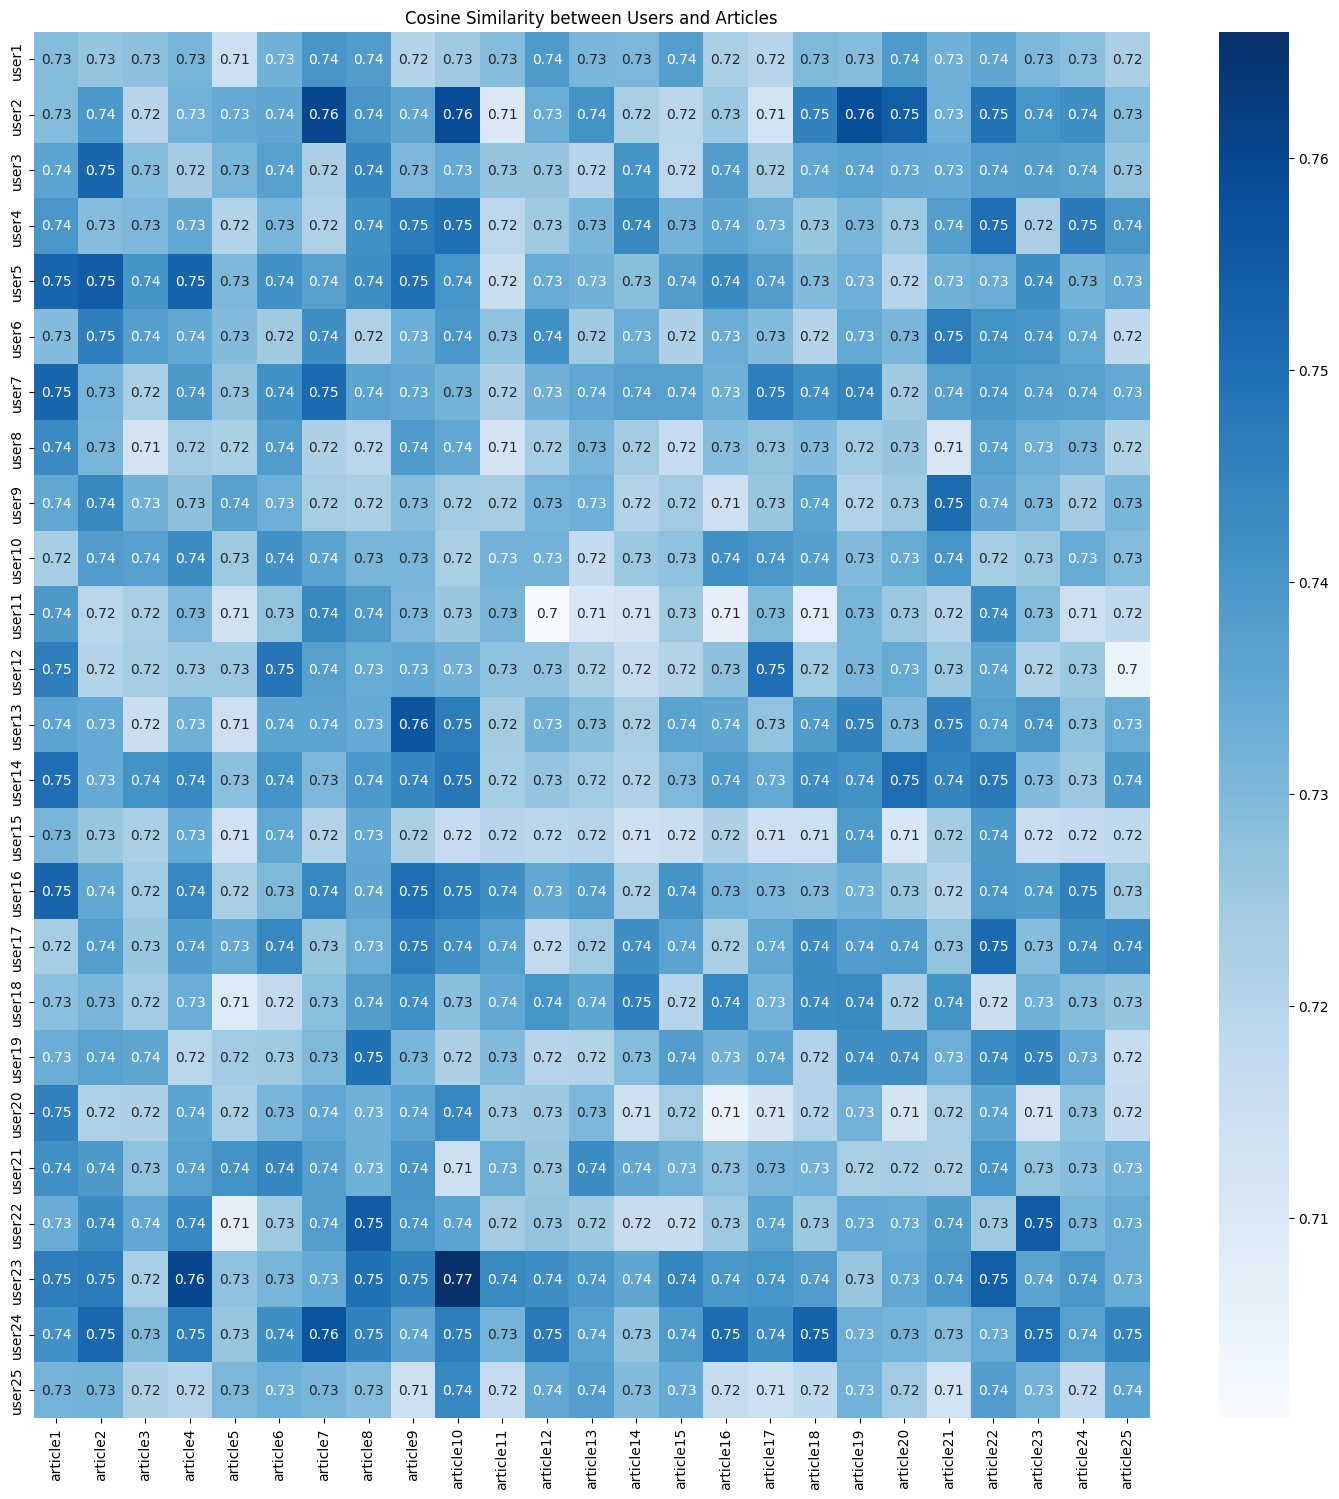

In [26]:
cosine_sim_df_small = cosine_sim_df.iloc[:25, :25]

plt.figure(figsize=(18, 18))
sns.heatmap(cosine_sim_df_small, annot = True, cmap='Blues')
plt.title('Cosine Similarity between Users and Articles')
plt.show()

In [27]:
# 각 사용자에게 추천 점수가 가장 높은 기사 추천

# 실제로 구현할 때는 해당 기사가 이미 읽었던 기사인지, 아닌지 검증하는 과정 추가 필요

recommendations = cosine_sim_df.idxmax(axis = 1)
recommendations

user1       article114
user2       article606
user3       article591
user4       article586
user5       article902
               ...    
user996     article452
user997     article492
user998     article179
user999     article891
user1000    article861
Length: 1000, dtype: object

In [28]:
# 추천 방법 2 : Matrix Factorization
# 행렬을 두 개의 저차원 행렬로 분해하여 각각 사용자와 기사의 잠재적 특성을 나타냄
# 잠재적 특성을 기반으로 사용자와 기사 사이의 관계를 예측

# 사용자-기사 행렬 생성
user_article_df = user_word_df_norm.dot(article_word_df.transpose())
# Min-Max 정규화
user_article_df = (user_article_df - user_article_df.min()) / (user_article_df.max() - user_article_df.min())
user_article_df

# 데이터를 Surprise 라이브러리가 사용할 수 있는 형태로 변환
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(user_article_df.stack().reset_index(), reader)

# Single Value Decomposition 알고리즘을 이용하여 Matrix Factorization 수행
algo = SVD()

# 5-Fold 교차 검증 수행(모델 성능 평가 지표로 RMSE, MAE를 사용)
# RMSE(Root Mean Squared Error)는 큰 오차에 더 큰 패널티를 부여하여 모델이 큰 오차를 최대한 줄이는 방향으로 학습
# MAE(Mean Absolute Error)는 모든 오차에 동일한 패널티를 부여하여 모델이 모든 데이터에 대해 균등하게 잘 예측할 수 있도록 학습
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

# 하이퍼파라미터 검증
# n_epochs : SVD 알고리즘의 학습 횟수(10 ~ 20번 학습하는 경우를 탐색한다,)
# lr_all : SVD 알고리즘의 학습률(모델이 학습하는 동안 각 단계에서 파라미터를 얼마나 빠르게 업데이트할지 결정)
# reg_all : SVD 알고리즘의 정규화 파라미터(Overfitting을 방지하기 위해 모델의 복잡도에 패널티를 부여)
# param_grid에서 지정한 모든 하이퍼파라미터 조합을 사용하여 모델을 학습하고 검증 데이터셋에 대한 성능을 평가하여 가장 성능이 좋은 하이퍼파라미터 조합을 선택
param_grid = {'n_epochs' : [10, 15, 20], 'lr_all' : [0.002, 0.005], 'reg_all': [0.4, 0.6], 'n_factors': [50, 100, 200]}
gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 5)
gs.fit(data)

print(gs.best_params['rmse'])

,article1,article2,article3,article4,article5,article6,article7,article8,article9,article10,...,article991,article992,article993,article994,article995,article996,article997,article998,article999,article1000
user1,0.374228,0.424354,0.528645,0.462061,0.398333,0.490228,0.512332,0.466906,0.373875,0.435926,...,0.405367,0.497967,0.322422,0.521123,0.408491,0.429570,0.608024,0.485451,0.439472,0.388416
user2,0.380204,0.534071,0.453371,0.473795,0.593067,0.523769,0.714589,0.490438,0.514572,0.731475,...,0.466105,0.612372,0.448041,0.517800,0.507991,0.432457,0.645696,0.516620,0.621152,0.585907
user3,0.420336,0.618106,0.521063,0.372840,0.532386,0.512322,0.318005,0.501171,0.440952,0.499083,...,0.609410,0.392945,0.401194,0.439361,0.390761,0.432135,0.567136,0.521079,0.518599,0.496227
user4,0.515058,0.483994,0.598292,0.540262,0.499483,0.522136,0.373823,0.543376,0.657881,0.689334,...,0.577796,0.571024,0.501401,0.528175,0.609070,0.421631,0.570867,0.584162,0.466173,0.452652
user5,0.559886,0.631280,0.629811,0.638300,0.519387,0.544064,0.453559,0.477949,0.612345,0.544080,...,0.538437,0.613231,0.400786,0.476163,0.599071,0.445815,0.529598,0.418522,0.442340,0.443013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user996,0.482968,0.353371,0.504102,0.343512,0.319498,0.422341,0.214236,0.539478,0.476536,0.312926,...,0.477690,0.353081,0.370577,0.423125,0.370728,0.311426,0.379326,0.335032,0.445240,0.356135
user997,0.417293,0.460151,0.324893,0.444681,0.398516,0.395722,0.336435,0.499087,0.360676,0.352815,...,0.450940,0.335276,0.376433,0.418148,0.533313,0.362254,0.375703,0.457915,0.497874,0.444293
user998,0.216857,0.307541,0.220257,0.206958,0.178144,0.384501,0.276155,0.164175,0.368338,0.288768,...,0.359019,0.243520,0.293365,0.287636,0.313213,0.366329,0.286072,0.254429,0.268056,0.252922
user999,0.348985,0.416341,0.391902,0.318891,0.256937,0.318855,0.292257,0.416549,0.547365,0.228587,...,0.372508,0.373218,0.352197,0.214565,0.307295,0.384138,0.377317,0.333224,0.315172,0.363079


In [ ]:
# 최적의 하이퍼파라미터로 SVD 알고리즘 객체 생성
algo = SVD(n_epochs = gs.best_params['rmse']['n_epochs'], lr_all = gs.best_params['rmse']['lr_all'], reg_all = gs.best_params['rmse']['reg_all'], n_factors=gs.best_params['rmse']['n_factors'])

# 학습 데이터셋을 전체 데이터셋으로 설정
trainset = data.build_full_trainset()

# 학습 데이터셋으로 모델 학습
algo.fit(trainset)

# 모든 사용자와 기사에 대해 예측 평점 계산
predictions = []
for user in user_article_df.index:
    for article in user_article_df.columns:
        predictions.append((user, article, algo.predict(user, article).est))

# 예측 평점을 DataFrame으로 변환
predictions_df = pd.DataFrame(predictions, columns=['user', 'article', 'rating'])

# 각 사용자별로 예측 평점이 가장 높은 상위 3개의 기사 선택
top_3_recommendations = predictions_df.groupby('user')['article', 'rating'].apply(lambda x: x.nlargest(3, 'rating'))

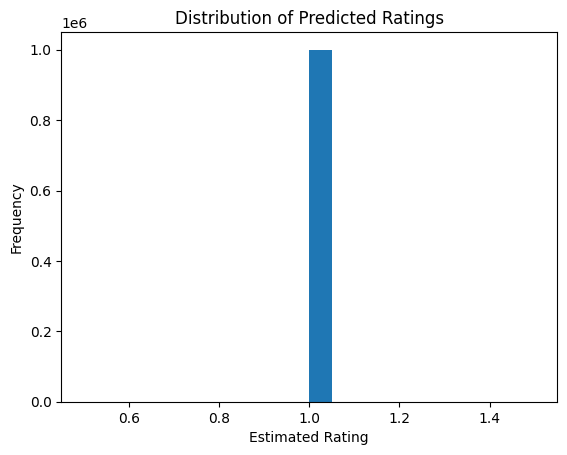

In [ ]:
# 모든 사용자-아이템 쌍에 대한 예측 점수 계산
all_predictions = [algo.predict(uid, iid) for uid in user_article_df.index for iid in user_article_df.columns]

# 예측 점수 분포를 히스토그램으로 출력
plt.hist([pred.est for pred in all_predictions], bins=20)
plt.xlabel('Estimated Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Ratings')
plt.show()